# IMPORT

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings 

# INFO DATA

In [11]:
df = pd.read_csv('clean_employee_promotion.csv')

In [12]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,Female,Male,No Promoted,Has Promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8.0,0,49.0,no_promoted,1.0,0.0,1.0,0.0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4.0,0,60.0,no_promoted,0.0,1.0,1.0,0.0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7.0,0,50.0,no_promoted,0.0,1.0,1.0,0.0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10.0,0,50.0,no_promoted,0.0,1.0,1.0,0.0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2.0,0,73.0,no_promoted,0.0,1.0,1.0,0.0


In [13]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,Female,Male,No Promoted,Has Promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.712238,0.297621,0.702379,0.914830,0.085170
std,22586.581449,0.609264,7.660169,1.211661,4.265094,0.150450,13.202334,0.457216,0.457216,0.279137,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,52.000000,0.000000,0.000000,1.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,62.000000,0.000000,1.000000,1.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,1.000000,1.000000,1.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  float64
 10  awards_won            54808 non-null  int64  
 11  avg_training_score    54808 non-null  float64
 12  is_promoted           54808 non-null  object 
 13  Female                54808 non-null  float64
 14  Male                  54808 non-null  float64
 15  No Promoted        

## Split Data

In [15]:
X = df[['no_of_trainings', 'previous_year_rating', 'length_of_service', 'awards_won', 'avg_training_score']]
Y = df['is_promoted']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2)

## K-Nearest Neighbor (KNN)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors = 5)
modelKNN.fit(X_test, Y_test)
hasilTrainingSetKNN = round (modelKNN.score(X_train, Y_train),3)
hasilTestSetKNN = round (modelKNN.score(X_test, Y_test),2)

print('Akurasi Training Set Model KNN :', hasilTrainingSetKNN)
print('Akurasi Test Set Model KNN :', hasilTestSetKNN)

Akurasi Training Set Model KNN : 0.918
Akurasi Test Set Model KNN : 0.93


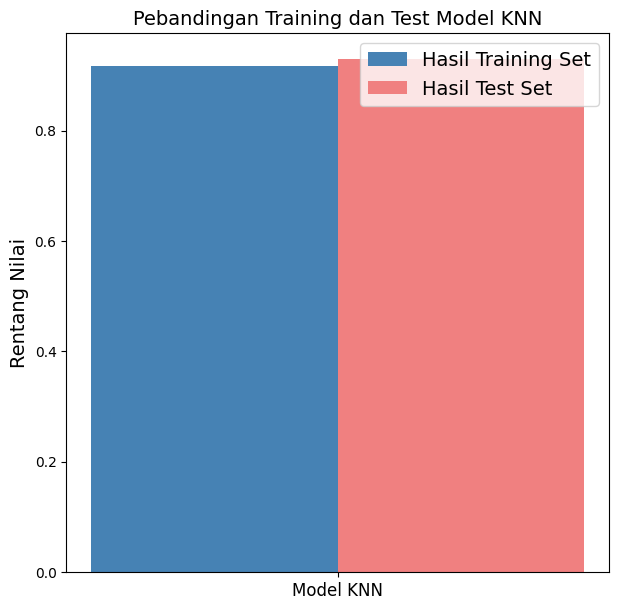

In [18]:
visual_knn = ['Model KNN']

x = np.arange(len(visual_knn))
width = 2

fig, ax = plt.subplots(figsize=(7, 7))

mhsa = ax.bar(x - width/2, hasilTrainingSetKNN, width, label='Hasil Training Set', color='steelblue')
mhsi = ax.bar(x + width/2, hasilTestSetKNN, width, label='Hasil Test Set', color='lightcoral')

ax.set_title('Pebandingan Training dan Test Model KNN', size=14)
ax.set_ylabel('Rentang Nilai', size=14)
ax.set_xticks(x)
ax.set_xticklabels(visual_knn, size=12)
ax.legend(fontsize=14)

plt.show()

## Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
gs = GaussianNB()
gs.fit(X_train, Y_train)

hasilTrainingNaiveBayes = round (gs.score(X_train, Y_train),2)
hasilTestNaiveBayes = round (gs.score(X_test, Y_test),2)

print('Akurasi Training Set Mode NaiveBayes : ', hasilTrainingNaiveBayes)
print('Akurasi Test Set Mode NaiveBayes : ', hasilTestNaiveBayes)

Akurasi Training Set Mode NaiveBayes :  0.91
Akurasi Test Set Mode NaiveBayes :  0.91


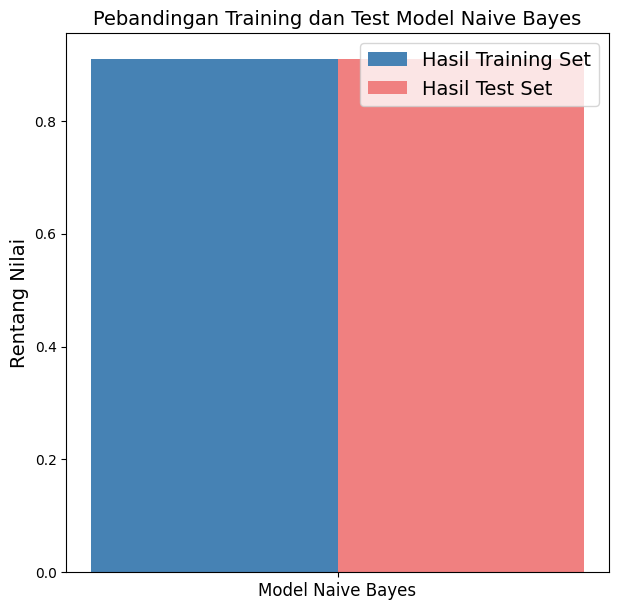

In [20]:
visual_knn = ['Model Naive Bayes']

x = np.arange(len(visual_knn))
width = 2

fig, ax = plt.subplots(figsize=(7, 7))

mhsa = ax.bar(x - width/2, hasilTrainingNaiveBayes, width, label='Hasil Training Set', color='steelblue')
mhsi = ax.bar(x + width/2, hasilTestNaiveBayes, width, label='Hasil Test Set', color='lightcoral')

ax.set_title('Pebandingan Training dan Test Model Naive Bayes', size=14)
ax.set_ylabel('Rentang Nilai', size=14)
ax.set_xticks(x)
ax.set_xticklabels(visual_knn, size=12)
ax.legend(fontsize=14)

plt.show()